In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:


df_7 = pd.read_csv('data/info2/repositories.csv')
fuente_7 = "https://github.com/github/innovationgraph/tree/main"


# fuente_7 =  https://github.com/madnight/githut
# ...

Muestra mediante un head() los principales datasets con los que vas a trabajar

In [3]:
df_7

,repositories,iso2_code,year,quarter
0,30669781,US,2020,1
1,20179087,CN,2020,1
2,17912888,EU,2020,1
3,9254535,IN,2020,1
4,4171705,GB,2020,1
...,...,...,...,...
4245,141,SH,2024,3
4246,128,CK,2024,3
4247,115,KI,2024,3
4248,104,MS,2024,3


In [4]:
df_7.head()

,repositories,iso2_code,year,quarter
0,30669781,US,2020,1
1,20179087,CN,2020,1
2,17912888,EU,2020,1
3,9254535,IN,2020,1
4,4171705,GB,2020,1


In [5]:
df_7_grouped =df_7.groupby(['year', "quarter",'iso2_code'])['repositories'].sum().reset_index()
df_7_grouped

,year,quarter,iso2_code,repositories
0,2020,1,AD,2109
1,2020,1,AE,169705
2,2020,1,AF,7235
3,2020,1,AG,665
4,2020,1,AL,36827
...,...,...,...,...
4226,2024,3,YE,111175
4227,2024,3,YT,1208
4228,2024,3,ZA,1275250
4229,2024,3,ZM,59395


In [6]:
df_7_grouped_sorted = df_7_grouped.sort_values(by=['year', "quarter",'repositories'], ascending=[True, True, False])
df_7_grouped_sorted

,year,quarter,iso2_code,repositories
199,2020,1,US,30669781
40,2020,1,CN,20179087
59,2020,1,EU,17912888
91,2020,1,IN,9254535
66,2020,1,GB,4171705
...,...,...,...,...
4185,2024,3,SH,141
4042,2024,3,CK,128
4110,2024,3,KI,115
4143,2024,3,MS,104


In [7]:
df_7_grouped_sorted["iso2_code"].unique()

array(['US', 'CN', 'EU', 'IN', 'GB', 'BR', 'DE', 'CA', 'RU', 'FR', 'JP',
       'KR', 'HK', 'ES', 'ID', 'UA', 'AU', 'PL', 'NL', 'VN', 'TW', 'MX',
       'SG', 'IT', 'SE', 'TR', 'CO', 'CH', 'TH', 'PH', 'IL', 'AR', 'BD',
       'BE', 'PK', 'IE', 'BY', 'NG', 'DK', 'RO', 'EG', 'FI', 'ZA', 'CZ',
       'PT', 'NZ', 'NO', 'MY', 'AT', 'PE', 'CL', 'KE', 'HU', 'BG', 'IR',
       'LK', 'GR', 'RS', 'SA', 'NP', 'MA', 'AE', 'TN', 'EC', 'LT', 'KZ',
       'EE', 'HR', 'CR', 'SK', 'VE', 'DZ', 'SI', 'GT', 'GH', 'LV', 'BO',
       'AM', 'DO', 'KH', 'MM', 'UY', 'UG', 'MD', 'JO', 'SV', 'BA', 'AZ',
       'IQ', 'UZ', 'GE', 'IS', 'KG', 'LU', 'PS', 'HN', 'LB', 'MK', 'AL',
       'CM', 'ET', 'TZ', 'CY', 'YE', 'PR', 'PY', 'SN', 'RW', 'KW', 'PA',
       'JM', 'MT', 'QA', 'ZW', 'CI', 'NI', 'MU', 'MN', 'MO', 'MG', 'HT',
       'SY', 'SD', 'OM', 'TT', 'BH', 'CU', 'ZM', 'ME', 'MZ', 'AO', 'RE',
       'LY', 'BJ', 'CD', 'LA', 'AF', 'TG', 'TJ', 'BB', 'MV', 'BW', 'SO',
       'BN', 'MW', 'NC', 'GP', 'BF', 'BM', 'IM', 'P

In [8]:
df_7_grouped_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4231 entries, 199 to 4134
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          4231 non-null   int64 
 1   quarter       4231 non-null   int64 
 2   iso2_code     4231 non-null   object
 3   repositories  4231 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 165.3+ KB


In [9]:
# Eliminamos la agrupación de valores en Europa,  ya que estos también estaban representados mediante los países independientes que lo componen. Por lo que estarían duplicados.

df_7_grouped_sorted_clean= df_7_grouped_sorted[df_7_grouped_sorted["iso2_code"] != "EU"]  # Removes rows where iso2_code is 'US'

In [10]:
df_7_grouped_sorted_clean

,year,quarter,iso2_code,repositories
199,2020,1,US,30669781
40,2020,1,CN,20179087
91,2020,1,IN,9254535
66,2020,1,GB,4171705
27,2020,1,BR,3602025
...,...,...,...,...
4185,2024,3,SH,141
4042,2024,3,CK,128
4110,2024,3,KI,115
4143,2024,3,MS,104


In [11]:
df_7_grouped_sorted_clean['indice'] = df_7_grouped_sorted_clean.groupby(['year',"quarter"]).cumcount() + 1
df_7_grouped_sorted_clean

C:\Users\guill\AppData\Local\Temp\ipykernel_4588\1202022039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7_grouped_sorted_clean['indice'] = df_7_grouped_sorted_clean.groupby(['year',"quarter"]).cumcount() + 1


,year,quarter,iso2_code,repositories,indice
199,2020,1,US,30669781,1
40,2020,1,CN,20179087,2
91,2020,1,IN,9254535,3
66,2020,1,GB,4171705,4
27,2020,1,BR,3602025,5
...,...,...,...,...,...
4185,2024,3,SH,141,225
4042,2024,3,CK,128,226
4110,2024,3,KI,115,227
4143,2024,3,MS,104,228


In [12]:
df_7_grouped_sorted_clean["year_quarter"] = df_7_grouped_sorted_clean["year"].astype("str") +"-Q"+  df_7_grouped_sorted_clean["quarter"].astype("str")
df_7_grouped_sorted_clean

C:\Users\guill\AppData\Local\Temp\ipykernel_4588\1618785653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7_grouped_sorted_clean["year_quarter"] = df_7_grouped_sorted_clean["year"].astype("str") +"-Q"+  df_7_grouped_sorted_clean["quarter"].astype("str")


,year,quarter,iso2_code,repositories,indice,year_quarter
199,2020,1,US,30669781,1,2020-Q1
40,2020,1,CN,20179087,2,2020-Q1
91,2020,1,IN,9254535,3,2020-Q1
66,2020,1,GB,4171705,4,2020-Q1
27,2020,1,BR,3602025,5,2020-Q1
...,...,...,...,...,...,...
4185,2024,3,SH,141,225,2024-Q3
4042,2024,3,CK,128,226,2024-Q3
4110,2024,3,KI,115,227,2024-Q3
4143,2024,3,MS,104,228,2024-Q3


In [13]:
df_7_lenguaje10 = df_7_grouped_sorted_clean[df_7_grouped_sorted_clean["indice"] <= 10]
df_7_lenguaje10

,year,quarter,iso2_code,repositories,indice,year_quarter
199,2020,1,US,30669781,1,2020-Q1
40,2020,1,CN,20179087,2,2020-Q1
91,2020,1,IN,9254535,3,2020-Q1
66,2020,1,GB,4171705,4,2020-Q1
27,2020,1,BR,3602025,5,2020-Q1
...,...,...,...,...,...,...
4072,2024,3,GB,9183908,6,2024-Q3
4106,2024,3,JP,8715809,7,2024-Q3
4177,2024,3,RU,8583507,8,2024-Q3
4053,2024,3,DE,8158633,9,2024-Q3


C:\Users\guill\AppData\Local\Temp\ipykernel_4588\3398381891.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  latest_values = df_7_lenguaje10.groupby('iso2_code').apply(


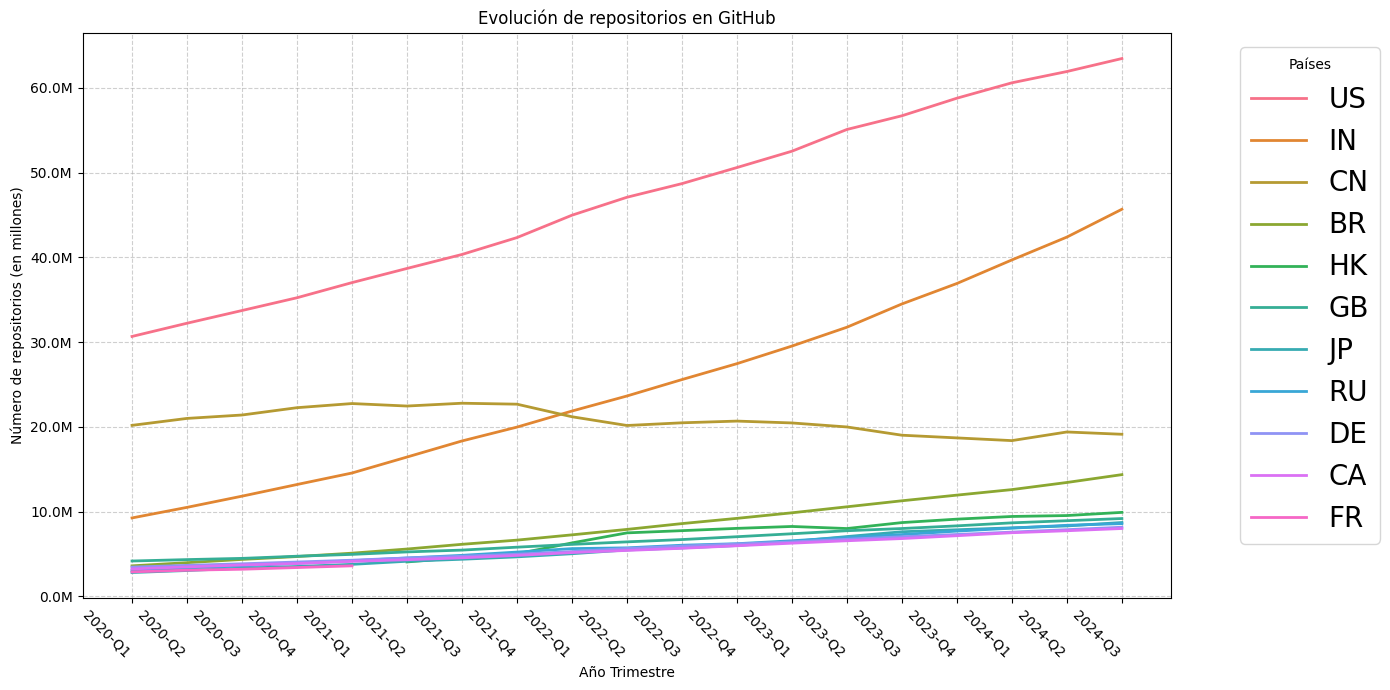

In [14]:
from matplotlib.ticker import FuncFormatter

# Step 1: Obtener el valor máximo de 'repositories' al final de la serie temporal para cada país
latest_values = df_7_lenguaje10.groupby('iso2_code').apply(
    lambda x: x.loc[x['year_quarter'].idxmax(), 'repositories']
).sort_values(ascending=False)

# Step 2: Obtener el orden de los países basado en el valor máximo de 'repositories'
ordered_iso2_codes = latest_values.index

# Create a custom formatter function to display values in millions
def millions(x, pos):
    return f'{x * 1e-6:.1f}M'  # Divide by 1e6 to convert to millions and format to one decimal place

# Create the line plot
plt.figure(figsize=(14, 7))

sns.lineplot(data=df_7_lenguaje10, x='year_quarter', y='repositories', hue='iso2_code', 
             linewidth=2, hue_order=ordered_iso2_codes)

# Customize labels and title
plt.xlabel('Año Trimestre')
plt.ylabel('Número de repositorios (en millones)')
plt.title('Evolución de repositorios en GitHub')

# Rotate the x-tick labels for better readability
plt.xticks(rotation=-45, ha='right')

# Apply the custom y-axis formatter to display values in millions
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

# Optional: Adjust the legend if needed
plt.legend(title='Países', loc='upper left', bbox_to_anchor=(1.05, 1),prop={'size': 20})

# Show gridlines for better visualization
plt.grid(True, linestyle="--", alpha=0.6)

# Tight layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()